In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data 
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# getting columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.shape

(1460, 81)

In [5]:
# Checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Getting nulls percentage 
(100*data.isna().sum()/len(data))[:40]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage     17.739726
LotArea          0.000000
Street           0.000000
Alley           93.767123
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [7]:
# Getting nulls percentage 

(100*data.isna().sum()/len(data))[40:]

HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageCars        0.000000
GarageArea        0.000000
GarageQual        5.547945
GarageCond        5.547945
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
PoolQC           99.520548
Fence            80.753425
MiscFeature      96.301370
MiscVal           0.000000
MoSold            0.000000
Y

**We will drop those variables which have more than 40% nulls**

**And**

**We will compute nulls using mean, mode, median of all other variables**

In [8]:
data.shape

(1460, 81)

In [9]:
# Dropping
data = data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
data.shape

(1460, 76)

In [10]:
# getting rid of nulls less than 40%

data['LotFrontage'] = data['LotFrontage'].fillna(value = data['LotFrontage'].median())

data['MasVnrType'] = data['MasVnrType'].fillna(value = data['MasVnrType'].mode()[0])

data['MasVnrArea'] = data['MasVnrArea'].fillna(value = data['MasVnrArea'].mode()[0])

data['BsmtQual'] = data['BsmtQual'].fillna(value = data['BsmtQual'].mode()[0])

data['BsmtCond'] = data['BsmtCond'].fillna(value = data['BsmtCond'].mode()[0])

data['BsmtExposure'] = data['BsmtExposure'].fillna(value = data['BsmtExposure'].mode()[0])

data['BsmtFinType1'] = data['BsmtFinType1'].fillna(value = data['BsmtFinType1'].mode()[0])

data['BsmtFinType2'] = data['BsmtFinType2'].fillna(value = data['BsmtFinType2'].mode()[0])

data['Electrical'] = data['Electrical'].fillna(value = data['Electrical'].mode()[0])

data['GarageType'] = data['GarageType'].fillna(value = data['GarageType'].mode()[0])

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(value = data['GarageYrBlt'].mode()[0])

data['GarageFinish'] = data['GarageFinish'].fillna(value = data['GarageFinish'].mode()[0])

data['GarageQual'] = data['GarageQual'].fillna(value = data['GarageQual'].mode()[0])

data['GarageCond'] = data['GarageCond'].fillna(value = data['GarageCond'].mode()[0])

data['GarageType'] = data['GarageType'].fillna(value = data['GarageType'].mode()[0])


In [11]:
# Checking nulls
(100*data.isna().sum()/len(data))[:40]

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Heating         0.0
HeatingQC       0.0
dtype: float64

In [12]:
# Checking nulls
(100*data.isna().sum()/len(data))[40:]

CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
dtype: float64

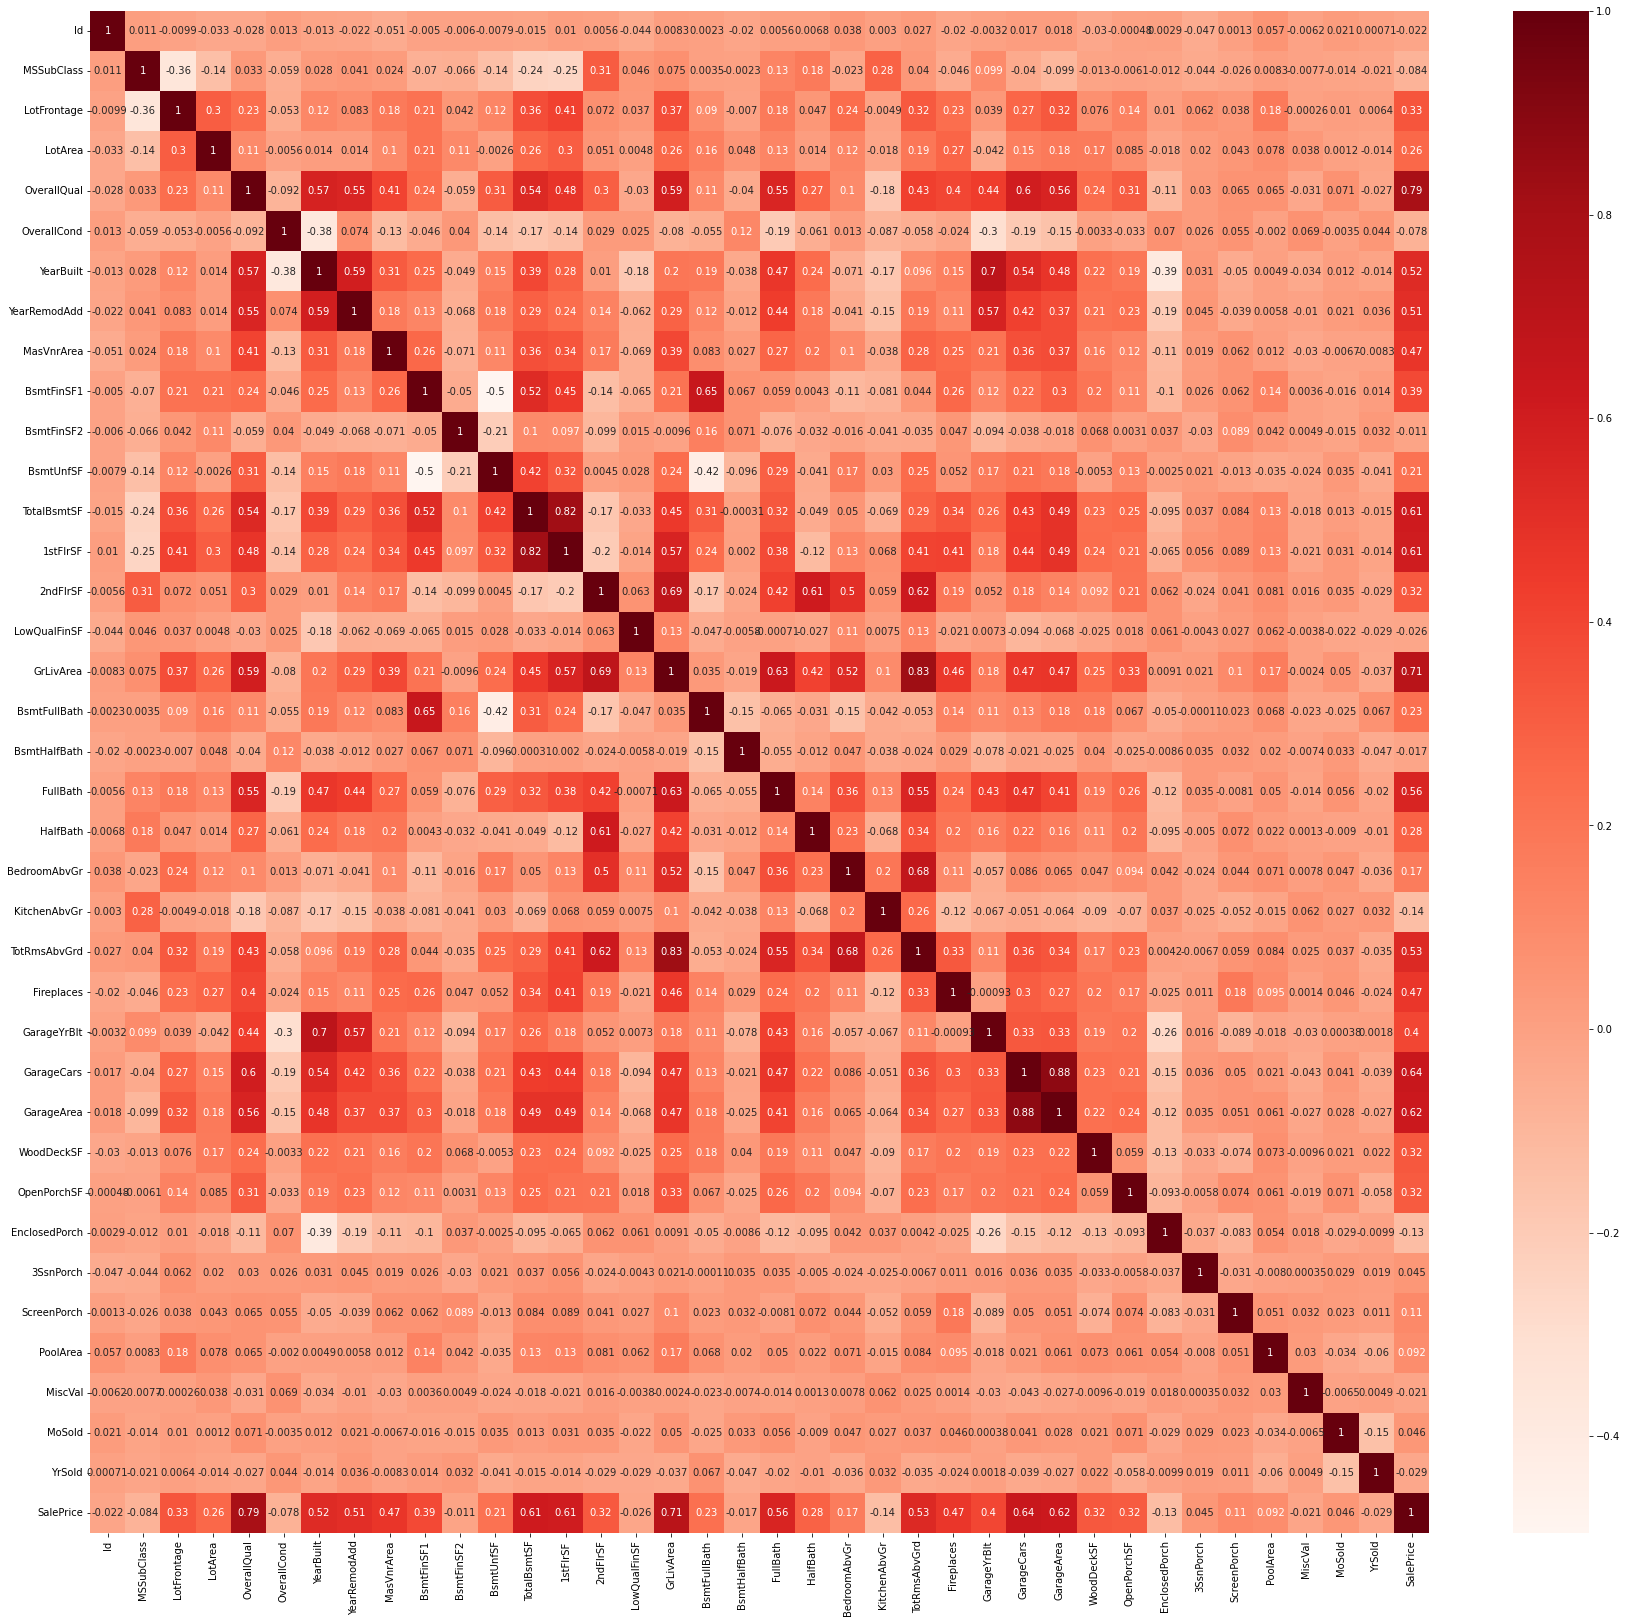

In [13]:
# Checking correlation 
plt.figure(figsize=[30,28])
sns.heatmap(data.corr(), cmap='Reds', annot=True)
plt.show()

In [14]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
# Getting variety in variables
data.nunique()[:40]

Id              1460
MSSubClass        15
MSZoning           5
LotFrontage      110
LotArea         1073
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        112
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       15
Exterior2nd       16
MasVnrType         4
MasVnrArea       327
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       637
BsmtFinType2       6
BsmtFinSF2       144
BsmtUnfSF        780
TotalBsmtSF      721
Heating            6
HeatingQC          5
dtype: int64

In [16]:
# Getting uniques 
data.nunique()[40:]

CentralAir         2
Electrical         5
1stFlrSF         753
2ndFlrSF         417
LowQualFinSF      24
GrLivArea        861
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       8
KitchenAbvGr       4
KitchenQual        4
TotRmsAbvGrd      12
Functional         7
Fireplaces         4
GarageType         6
GarageYrBlt       97
GarageFinish       3
GarageCars         5
GarageArea       441
GarageQual         5
GarageCond         5
PavedDrive         3
WoodDeckSF       274
OpenPorchSF      202
EnclosedPorch    120
3SsnPorch         20
ScreenPorch       76
PoolArea           8
MiscVal           21
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
SalePrice        663
dtype: int64

In [17]:
# getting categorical columns

cat_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
           'Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
           'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'Heating',
           'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
           'GarageCond','PavedDrive','SaleType','SaleCondition']

In [18]:
# getting continous columns

cont_cols = [ 'MSSubClass', 'LotFrontage', 'LotArea',
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

#### Always do like this 

- cars_categorical = data.select_dtypes(include=['object'])

- cars_categorical.head()


#### Always do like this 

- cont2 = data.select_dtypes(include=['int64', 'float64'])

- cont2.head()

In [19]:
# Getting dummies
dummy1 = pd.get_dummies(data[cat_cols], drop_first=True)
dummy1.shape

(1460, 198)

In [20]:
len(cont_cols)

35

In [21]:
# Concatenating dummies with other 
data_final = pd.concat([data[cont_cols],dummy1], axis=1)
data_final.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting into train and test 

df_train, df_test = train_test_split(data_final, train_size=0.7, random_state=100)
df_train.shape, df_test.shape

((1021, 233), (439, 233))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Scaling the data 
scaler = MinMaxScaler()

df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])

df_test[cont_cols] = scaler.transform(df_test[cont_cols])

In [26]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.195498,0.169688,0.042580,0.718431,0.576500,0.062453,0.076739,0.025998,0.246305,0.171326,...,0.004556,0.002278,0.095672,0.0,0.861048,0.002278,0.009112,0.013667,0.808656,0.102506
std,0.233458,0.074967,0.042978,0.217104,0.346002,0.102809,0.077027,0.092564,0.182297,0.063409,...,0.067420,0.047727,0.294476,0.0,0.346291,0.047727,0.095127,0.116239,0.393808,0.303658
min,0.000000,0.000000,-0.000828,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029293,0.594203,0.266667,0.000000,0.000000,0.000000,0.109161,0.133061,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.164384,0.036947,0.724638,0.716667,0.000000,0.063962,0.000000,0.214041,0.160884,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.235294,0.202055,0.047823,0.934783,0.900000,0.108750,0.125177,0.000000,0.346318,0.204255,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.736888,0.992754,1.000000,0.575625,0.387668,0.764586,0.828339,0.413093,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226306,0.166332,0.042162,0.719719,0.583072,0.065306,0.079406,0.033980,0.241329,0.173813,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.254701,0.075653,0.048221,0.219718,0.343416,0.117088,0.082409,0.115907,0.192097,0.075139,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.027937,0.594203,0.283333,0.000000,0.000000,0.000000,0.092466,0.129787,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.164384,0.037555,0.731884,0.733333,0.000000,0.069454,0.000000,0.197774,0.162684,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.195205,0.046943,0.927536,0.900000,0.098750,0.126152,0.000000,0.345034,0.215057,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Getting X and Y


In [28]:
# Getting x and y train

y_train = np.array(df_train.pop('SalePrice')).reshape(-1,1)
X_train = df_train

In [29]:
# Getting x and y test

y_test = np.array(df_test.pop('SalePrice')).reshape(-1,1)
X_test = df_test

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
 # linear reg
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# prediction
y_train_pred_lr = lr.predict(X_train)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
print("Train R2 score is :- ",r2_score(y_train, y_train_pred_lr) )
print("Train Mean Squared Error is:- ",mean_squared_error(y_train, y_train_pred_lr))
print("Train Root Mean square is :- ", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))

Train R2 score is :-  0.9482766532574021
Train Mean Squared Error is:-  0.0006234796585340227
Train Root Mean square is :-  0.024969574656650093


In [36]:
# Prediction
y_test_pred_lr = lr.predict(X_test)

In [37]:
print("Test R2 score is :- ",r2_score(y_test, y_test_pred_lr) )
print("Test Mean Squared Error is:- ",mean_squared_error(y_test, y_test_pred_lr))
print("Test Root Mean square is :- ", np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))

Test R2 score is :-  -8.650912862688401e+21
Test Mean Squared Error is:-  1.0738452760722748e+20
Test Root Mean square is :-  10362650607.21568


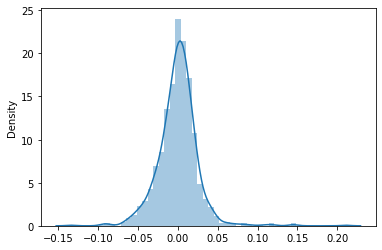

In [38]:
# Plotting residuals
res = y_train - y_train_pred_lr
sns.distplot(res,kde=True)
plt.show()

In [39]:
# Getting all in one list

metric_lr = []

metric_lr.append(r2_score(y_train, y_train_pred_lr))
metric_lr.append(r2_score(y_test, y_test_pred_lr))

metric_lr.append(np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
metric_lr.append(np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))

metric_lr.append(mean_squared_error(y_train, y_train_pred_lr))
metric_lr.append(mean_squared_error(y_test, y_test_pred_lr))

metric_lr

[0.9482766532574021,
 -8.650912862688401e+21,
 0.024969574656650093,
 10362650607.21568,
 0.0006234796585340227,
 1.0738452760722748e+20]

# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import GridSearchCV 

In [41]:
# Ridge Reg
%%time
params = {'alpha': [0.0001, 0.001, 0.01, 0.1,0.5,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                     1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 70, 100 ,200,500, 1000  ]}
ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, cv = 5, 
                        scoring = 'neg_mean_absolute_error', 
                        verbose = 1, n_jobs = -1,
            return_train_score = True)

Wall time: 0 ns


In [42]:
# fitting ridge
%%time
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
Wall time: 5.13 s


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 70,
                                   100, 200, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
model_cv.best_params_

{'alpha': 6.0}

In [44]:
# fitting based on best params
ridge2 = Ridge(alpha = 6)

ridge2.fit(X_train, y_train)

Ridge(alpha=6)

In [45]:
# Prediction
y_train_pred_ridge = ridge2.predict(X_train)

In [46]:
# Prediction
y_test_pred_ridge = ridge2.predict(X_test)

In [47]:
print("Ridge Train R2 score:- ", r2_score(y_train, y_train_pred_ridge))
print("Ridge Test R2 score:- ", r2_score(y_test, y_test_pred_ridge))

Ridge Train R2 score:-  0.8908758206251777
Ridge Test R2 score:-  0.8664672805439081


In [48]:
print("Ridge Train Mean Squared Error is:- ",mean_squared_error(y_train, y_train_pred_ridge))
print("Ridge Train Root Mean square is :- ", np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))

print("Ridge Test Mean Squared Error is:- ",mean_squared_error(y_test, y_test_pred_ridge))
print("Ridge Test Root Mean square is :- ", np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))

Ridge Train Mean Squared Error is:-  0.0013153964385368437
Ridge Train Root Mean square is :-  0.03626839448523802
Ridge Test Mean Squared Error is:-  0.0016575531653713475
Ridge Test Root Mean square is :-  0.04071305890462355


In [49]:
# getting all in one 

metric_ridge = []

metric_ridge.append(r2_score(y_train, y_train_pred_ridge))
metric_ridge.append(r2_score(y_test, y_test_pred_ridge))

metric_ridge.append(np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
metric_ridge.append(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))

metric_ridge.append(mean_squared_error(y_train, y_train_pred_ridge))
metric_ridge.append(mean_squared_error(y_test, y_test_pred_ridge))

metric_ridge

[0.8908758206251777,
 0.8664672805439081,
 0.03626839448523802,
 0.04071305890462355,
 0.0013153964385368437,
 0.0016575531653713475]

# Lasso 

In [51]:
# Lasso Reg 
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3, 4, 5, 6, 7, 8, 9, 10, 
                   20, 50, 100, 1000]}

lasso = Lasso()

model_cv2 = GridSearchCV(estimator= lasso, scoring = 'neg_mean_absolute_error', param_grid=params, cv=5, verbose=1, n_jobs=-1,
                        return_train_score=True)
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 50, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
model_cv2.best_params_

{'alpha': 0.0001}

In [53]:
# Lasso based on best params 
lasso2 = Lasso(alpha=0.0001)

lasso2.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [54]:
# Prediction
y_train_pred_lasso = lasso2.predict(X_train)

y_test_pred_lasso = lasso2.predict(X_test)

In [55]:
print("Lasso Train R2 score:- ", r2_score(y_train, y_train_pred_lasso))
print("Lasso Test R2 score:- ", r2_score(y_test, y_test_pred_lasso))

Lasso Train R2 score:-  0.9050399857622513
Lasso Test R2 score:-  0.8579740007362695


In [56]:
print("Lasso Train Mean Squared Error is:- ",mean_squared_error(y_train, y_train_pred_lasso))
print("Lasso Train Root Mean square is :- ", np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))

print("Lasso Test Mean Squared Error is:- ",mean_squared_error(y_test, y_test_pred_lasso))
print("Lasso Test Root Mean square is :- ", np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))

Lasso Train Mean Squared Error is:-  0.0011446598292638574
Lasso Train Root Mean square is :-  0.03383282177507305
Lasso Test Mean Squared Error is:-  0.0017629809802685416
Lasso Test Root Mean square is :-  0.04198786706024184


In [57]:
# Getting all in one 
metric_lasso = []

metric_lasso.append(r2_score(y_train, y_train_pred_lasso))
metric_lasso.append(r2_score(y_test, y_test_pred_lasso))

metric_lasso.append(np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
metric_lasso.append(np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))

metric_lasso.append(mean_squared_error(y_train, y_train_pred_lasso))
metric_lasso.append(mean_squared_error(y_test, y_test_pred_lasso))

# comparing all metrics of Linear, Ridge, Lasso Regression

In [59]:
 # making df 
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.482767e-01,0.890876,0.905040
1,R2 Score (Test),-8.650913e+21,0.866467,0.857974
2,RSS (Train),2.496957e-02,0.036268,0.033833
3,RSS (Test),1.036265e+10,0.040713,0.041988
4,MSE (Train),6.234797e-04,0.001315,0.001145
5,MSE (Test),1.073845e+20,0.001658,0.001763


# Let's observe coefficients after Regularization

In [60]:
# making df for coefs 
betas = pd.DataFrame(index=df_train.columns)
betas.rows = df_train.columns

In [61]:
# getting as per lr, ridge, lasso 

betas['Linear'] = lr.coef_.reshape(-1,1)
betas['Ridge'] = ridge2.coef_.reshape(-1,1)
betas['Lasso'] = lasso2.coef_.reshape(-1,1)

In [62]:
pd.set_option('display.max_rows', None)
betas.head(232)

,Linear,Ridge,Lasso
MSSubClass,-1.038856e-02,-0.024649,-0.032057
LotFrontage,3.949256e-02,-0.001990,-0.000000
LotArea,2.118396e-01,0.023829,0.039098
YearBuilt,7.919431e-02,0.004330,0.012288
YearRemodAdd,9.591259e-03,0.011320,0.009116
MasVnrArea,4.759296e-02,0.031945,0.032801
BsmtFinSF1,1.428003e+11,0.013486,0.000000
BsmtFinSF2,3.729404e+10,0.008473,0.000000
BsmtUnfSF,5.910372e+10,0.014491,0.001022
TotalBsmtSF,-1.545906e+11,0.020042,0.000000
